# Heart Disease Classification

In this notebook, we will try to find out whether the patient has heart diease or not using the Heart disease Dataset and compare the specified 5 machine learning algorithm and try to justify the behaviour of each.

### Import Modules

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
from sklearn import preprocessing

pd.set_option('display.max_columns', None)

In [3]:
# Set the path to assess the files
path = r"D:\Niranjan\Personal Docs\UpGrad\Deployment\Docker+FastAPI\Heart Disease Prediction\Niranjan_Heart_dieases_calssification"
os.chdir(path)

## Section 1 - Loading the data and Exploratory Data Analysis

In [4]:
# Load the data
data_path = r"Data\heart.csv"
data = pd.read_csv(data_path)
data.head()

age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
0   63    1                3         145          233                    1   
1   37    1                2         130          250                    0   
2   41    0                1         130          204                    0   
3   56    1                1         120          236                    0   
4   57    0                0         120          354                    0   

   restecg  max_hr  exang  oldpeak  slope  num_major_vessels  thal  target  
0        0     150      0      2.3      0                  0     1       1  
1        1     187      0      3.5      0                  0     2       1  
2        0     172      0      1.4      2                  0     2       1  
3        1     178      0      0.8      2                  0     2       1  
4        1     163      1      0.6      2                  0     2       1

In [5]:
data.shape

(303, 14)

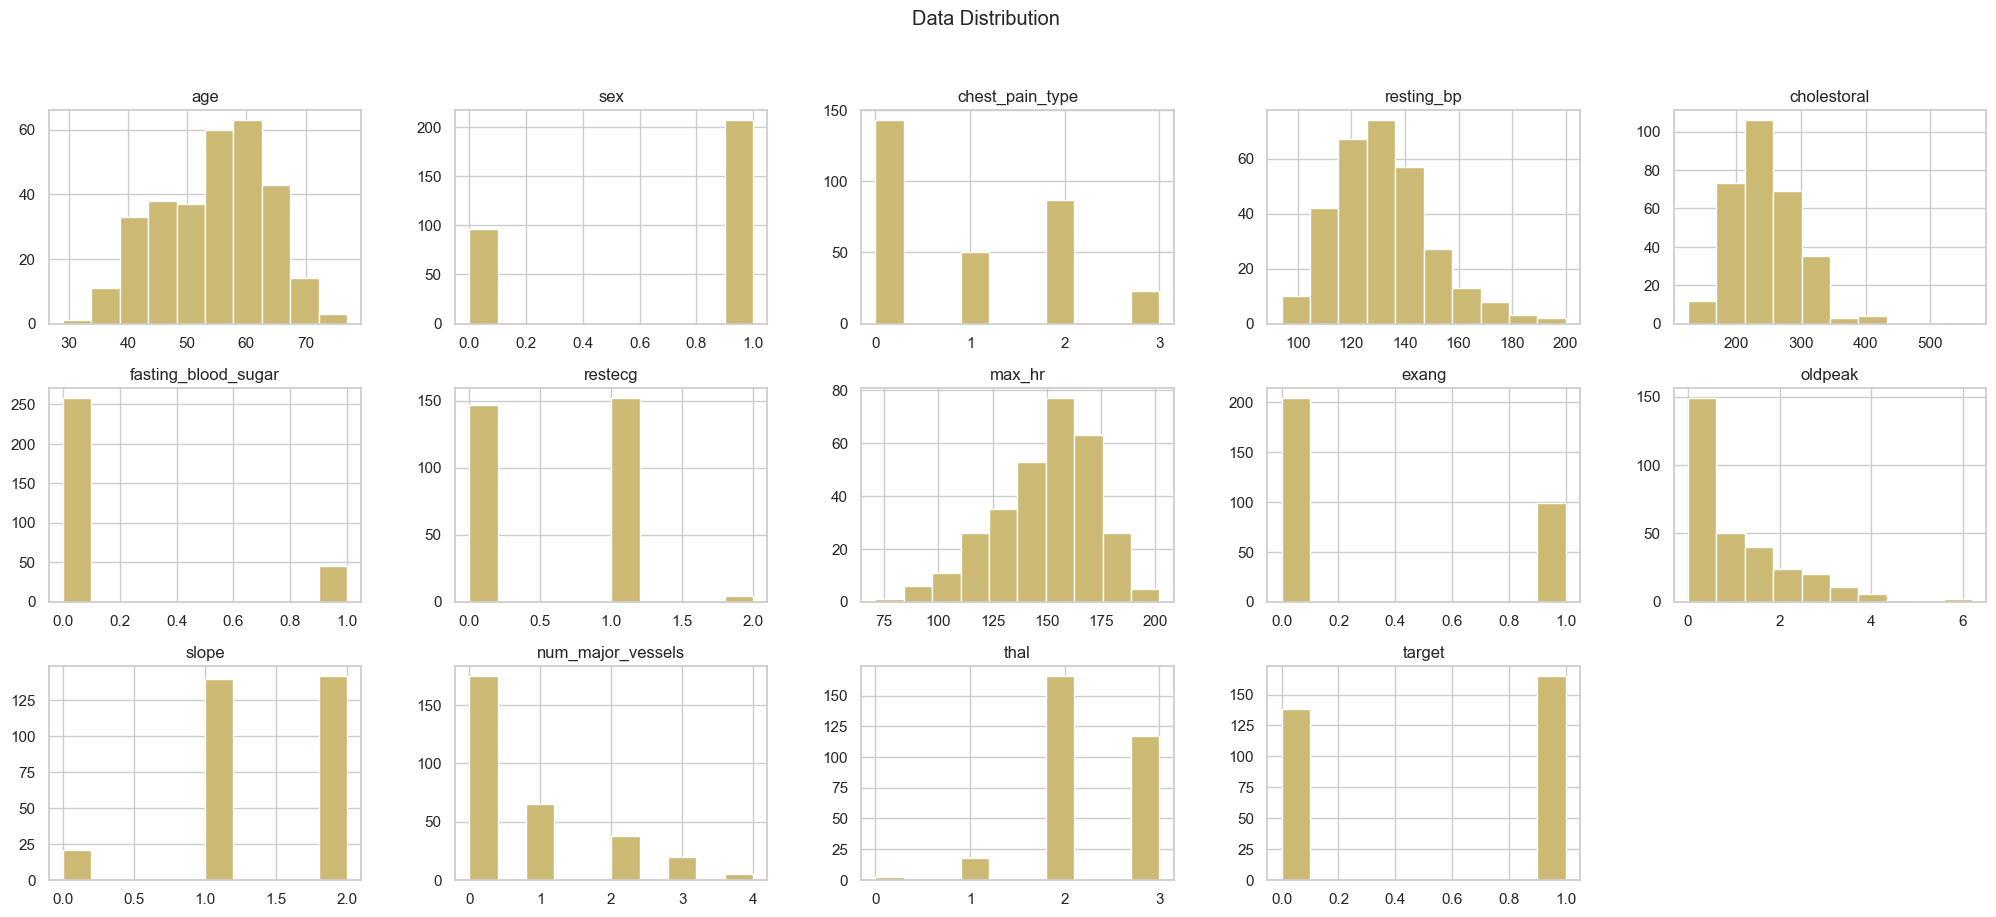

In [6]:
# Check the data Distribution -
data.hist(layout=(3,5), figsize=(25,10), color = "y")
plt.suptitle("Data Distribution")
plt.savefig(r'Plots\Data Distribution.png')
plt.show()

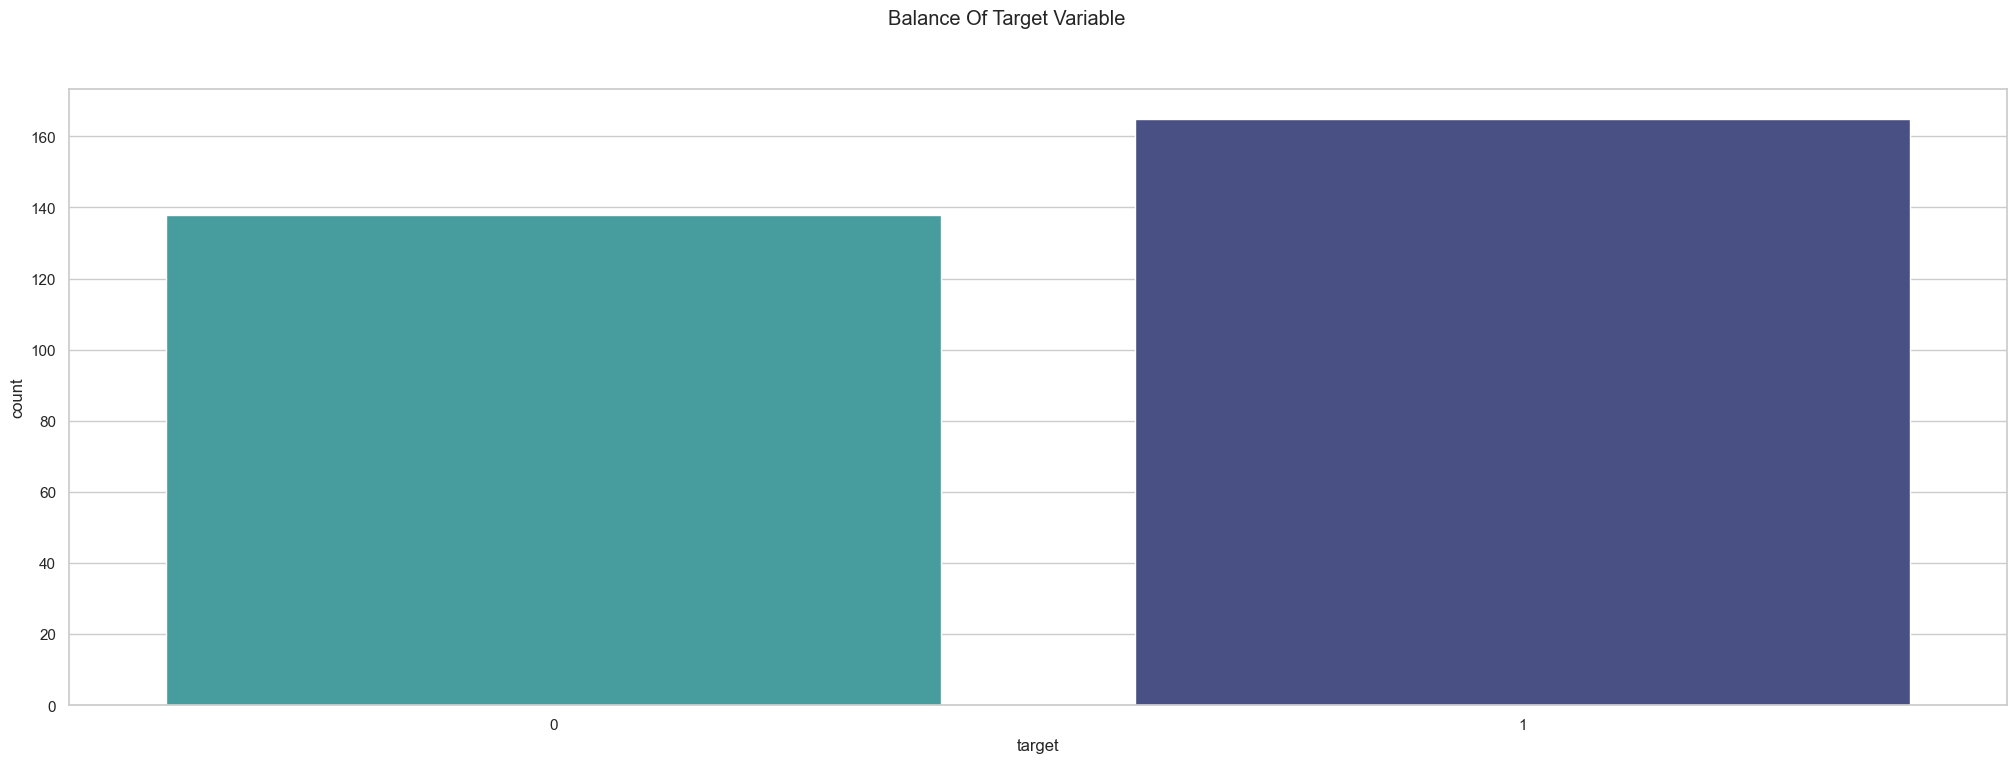

In [7]:
# Check the distribution of the data set -
plt.figure(figsize=(25,8))
sns.countplot(x='target', data=data, palette="mako_r")
plt.suptitle('Balance Of Target Variable')
plt.savefig(r'Plots\Distribution of Target variable')
plt.show()

* Comment -  The target variable looks very balanced. No need to balance the data.

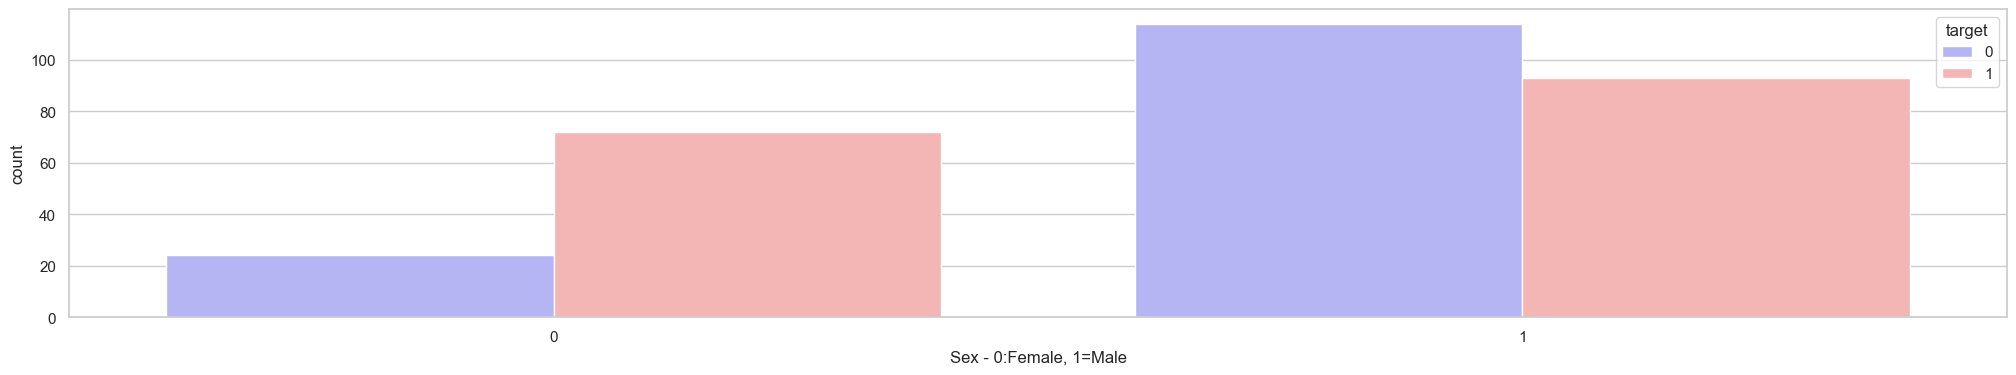

In [8]:
# Check the sex ratio
plt.figure(figsize=(25,4))
sns.countplot(x=data['sex'], hue=data['target'], palette='bwr')
plt.xlabel("Sex - 0:Female, 1=Male")
plt.show()

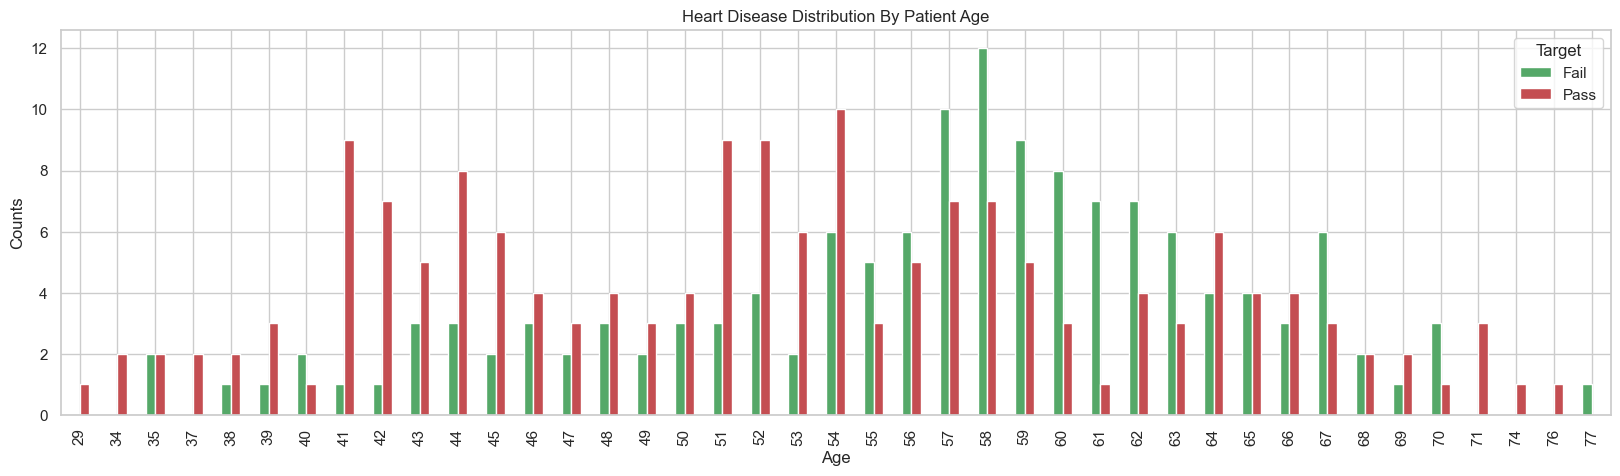

In [9]:
# Distribution by Age
ax = pd.crosstab(data.age,data.target).plot(kind='bar', figsize=(20,5), color=['g', 'r'])
plt.title("Heart Disease Distribution By Patient Age")
plt.xlabel('Age')
plt.ylabel('Counts')
ax.get_legend().remove()
plt.legend(["Fail", "Pass"], title = 'Target')
plt.savefig(r"Plots\Heart Disease Distribution By Patient Age.pdf")
plt.show()

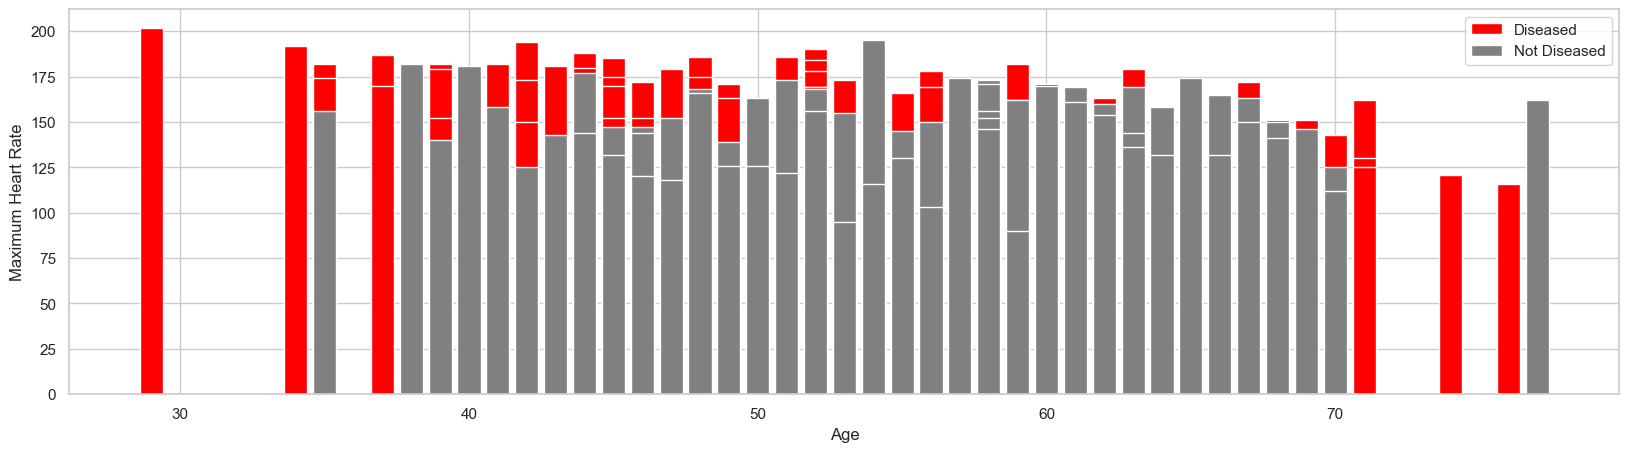

In [10]:
plt.figure(figsize=(20,5))
plt.bar(data.age[data.target==1], data.max_hr[data.target==1], color='red')
plt.bar(data.age[data.target==0], data.max_hr[data.target==0], color='grey')
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.savefig(r"Plots\Age vs Max_hr.pdf")
plt.show()

## Section 2 - Data Pre-Processing

Inspect for duplicate data, correlation, missing values, outliers, one-hot encoding for categorical values etc.

In [11]:
# Null or missing Values -
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [12]:
# Duplication Inspection
data.duplicated().any()

True

- **From above it seems that there are duplicates in the file.**

In [13]:
data.drop_duplicates(subset=None, inplace=True)
data.duplicated().any()

False

In [14]:
# Check the shape of the data frame
data.shape

(302, 14)

So, we can see that there was one duplicate row

In [15]:
data['thal'].value_counts()

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

In [16]:
# One hot Encoding
features_to_encode = ['thal', 'slope', 'chest_pain_type', 'restecg']
data = pd.get_dummies(data, columns=features_to_encode, dtype=int,drop_first=True)
data.shape


(302, 20)

In [17]:
# Outlier Inspection
data.describe()

age         sex  resting_bp  cholestoral  fasting_blood_sugar  \
count  302.00000  302.000000  302.000000   302.000000           302.000000   
mean    54.42053    0.682119  131.602649   246.500000             0.149007   
std      9.04797    0.466426   17.563394    51.753489             0.356686   
min     29.00000    0.000000   94.000000   126.000000             0.000000   
25%     48.00000    0.000000  120.000000   211.000000             0.000000   
50%     55.50000    1.000000  130.000000   240.500000             0.000000   
75%     61.00000    1.000000  140.000000   274.750000             0.000000   
max     77.00000    1.000000  200.000000   564.000000             1.000000   

           max_hr       exang     oldpeak  num_major_vessels      target  \
count  302.000000  302.000000  302.000000         302.000000  302.000000   
mean   149.569536    0.327815    1.043046           0.718543    0.543046   
std     22.903527    0.470196    1.161452           1.006748    0.498970   
min     71.000000    0.000000    0.000000           0.000000    0.000000   
25%    133.250000    0.000000    0.000000           0.000000    0.000000   
50%    152.500000    0.000000    0.800000           0.000000    1.000000   
75%    166.000000    1.000000    1.600000           1.000000    1.000000   
max    202.000000    1.000000    6.200000           4.000000    1.000000   

           thal_1      thal_2      thal_3     slope_1     slope_2  \
count  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.059603    0.546358    0.387417    0.463576    0.466887   
std      0.237142    0.498673    0.487969    0.499499    0.499730   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000   
75%      0.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       chest_pain_type_1  chest_pain_type_2  chest_pain_type_3  restecg_1  \
count         302.000000         302.000000         302.000000  302.00000   
mean            0.165563           0.284768           0.076159    0.50000   
std             0.372305           0.452053           0.265693    0.50083   
min             0.000000           0.000000           0.000000    0.00000   
25%             0.000000           0.000000           0.000000    0.00000   
50%             0.000000           0.000000           0.000000    0.50000   
75%             0.000000           1.000000           0.000000    1.00000   
max             1.000000           1.000000           1.000000    1.00000   

        restecg_2  
count  302.000000  
mean     0.013245  
std      0.114512  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

age                   -0.221476
sex                   -0.283609
resting_bp            -0.146269
cholestoral           -0.081437
fasting_blood_sugar   -0.026826
max_hr                 0.419955
exang                 -0.435601
oldpeak               -0.429146
num_major_vessels     -0.408992
target                 1.000000
thal_1                -0.105986
thal_2                 0.526030
thal_3                -0.484887
slope_1               -0.360258
slope_2                0.392121
chest_pain_type_1      0.247649
chest_pain_type_2      0.313696
chest_pain_type_3      0.087959
restecg_1              0.172827
restecg_2             -0.068156
Name: target, dtype: float64


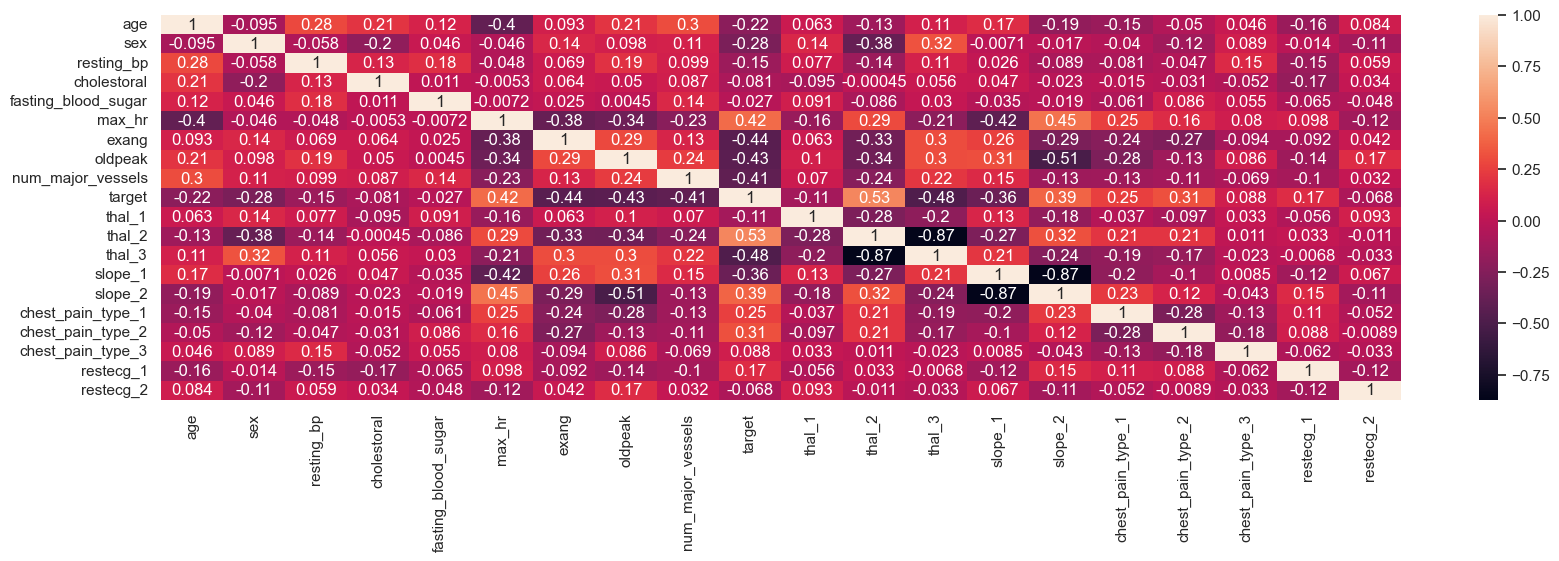

In [18]:
# Data Correlation
print(data.corr()['target'])
plt.figure(figsize=[20,5])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [19]:
data

age  sex  resting_bp  cholestoral  fasting_blood_sugar  max_hr  exang  \
0     63    1         145          233                    1     150      0   
1     37    1         130          250                    0     187      0   
2     41    0         130          204                    0     172      0   
3     56    1         120          236                    0     178      0   
4     57    0         120          354                    0     163      1   
..   ...  ...         ...          ...                  ...     ...    ...   
298   57    0         140          241                    0     123      1   
299   45    1         110          264                    0     132      0   
300   68    1         144          193                    1     141      0   
301   57    1         130          131                    0     115      1   
302   57    0         130          236                    0     174      0   

     oldpeak  num_major_vessels  target  thal_1  thal_2  thal_3  slope_1  \
0        2.3                  0       1       1       0       0        0   
1        3.5                  0       1       0       1       0        0   
2        1.4                  0       1       0       1       0        0   
3        0.8                  0       1       0       1       0        0   
4        0.6                  0       1       0       1       0        0   
..       ...                ...     ...     ...     ...     ...      ...   
298      0.2                  0       0       0       0       1        1   
299      1.2                  0       0       0       0       1        1   
300      3.4                  2       0       0       0       1        1   
301      1.2                  1       0       0       0       1        1   
302      0.0                  1       0       0       1       0        1   

     slope_2  chest_pain_type_1  chest_pain_type_2  chest_pain_type_3  \
0          0                  0                  0                  1   
1          0                  0                  1                  0   
2          1                  1                  0                  0   
3          1                  1                  0                  0   
4          1                  0                  0                  0   
..       ...                ...                ...                ...   
298        0                  0                  0                  0   
299        0                  0                  0                  1   
300        0                  0                  0                  0   
301        0                  0                  0                  0   
302        0                  1                  0                  0   

     restecg_1  restecg_2  
0            0          0  
1            1          0  
2            0          0  
3            1          0  
4            1          0  
..         ...        ...  
298          1          0  
299          1          0  
300          1          0  
301          1          0  
302          0          0  

[302 rows x 20 columns]

In [20]:
data.columns

Index(['age', 'sex', 'resting_bp', 'cholestoral', 'fasting_blood_sugar',
       'max_hr', 'exang', 'oldpeak', 'num_major_vessels', 'target', 'thal_1',
       'thal_2', 'thal_3', 'slope_1', 'slope_2', 'chest_pain_type_1',
       'chest_pain_type_2', 'chest_pain_type_3', 'restecg_1', 'restecg_2'],
      dtype='object')

## Section 3 - Feature Engineering

* We will reomve the outliers using Nelson's 1st rule
* Normalize the data

In [21]:
feature_engg_data = data.copy()
outlier_data = data.copy()
target_index = data.columns.get_loc('target')
factor = 3
columns_to_include = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak', 'num_major_vessels']
for column in columns_to_include:
    upper_limit = feature_engg_data[column].mean() + (feature_engg_data[column].std() * factor)
    lower_limit = feature_engg_data[column].mean() - (feature_engg_data[column].std() * factor)
    features_to_encode = feature_engg_data[(feature_engg_data[column]< upper_limit) & (feature_engg_data[column] > lower_limit)]
    
outlier_data = pd.concat([outlier_data,features_to_encode]).drop_duplicates(keep=False)

In [22]:
print(feature_engg_data.shape)
print(outlier_data.shape)

(302, 20)
(4, 20)


In [23]:
# Data Normalization 
scaler = preprocessing.MinMaxScaler()
feature_engg_data[columns_to_include] = scaler.fit_transform(feature_engg_data[columns_to_include])
outlier_data[columns_to_include] = scaler.fit_transform(outlier_data[columns_to_include])

In [24]:
# Train test split
from sklearn.model_selection import train_test_split

targets = feature_engg_data.pop('target')
input_data = feature_engg_data

x, x_test, y, y_test = train_test_split(input_data, targets, test_size=0.1, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size = 0.22, random_state=43)

## Section 4 - Building the Model

### Model Evaluation Metrics

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import math

def evaluation_metrics(y_true, y_pred, model):
    
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"Accuracy of {model} : {accuracy:.2f}")
    print(f"ROC AUC Score of {model} : {roc_auc:.2f}")
    print(f"Confusion Matrix of {model} : {cm}")
    
    plt.figure(figsize=(25,5))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square= True, cmap='Blues')
    plt.ylabel('Actual lable')
    plt.xlabel('Predicted lable')
    title = f'AUC-ROC Score: {roc_auc:.2f}'
    plt.title(title)
    plt.show()

In [26]:
import time

def ml_model(classifier, classifier_name, **kwargs):
    '''
    Generic method to train the selected classification algorithm on train, validation, and test dataset.
    '''
    # Fit the model
    if kwargs['x_train'] is not None:
        model = classifier.fit(kwargs['x_train'], kwargs['y_train'])
        y_pred_train = model.predict(kwargs['x_train'])
        print('*******************************************************')
        print('Training Set Performance : ')
        print('*******************************************************')
        evaluation_metrics(kwargs['y_train'], y_pred_train, classifier_name)
    
    if kwargs['x_valid'] is not None:
        y_pred_valid = model.predict(kwargs['x_valid'])
        print('*******************************************************')
        print('Validation Set Performance : ')
        print('*******************************************************')
        evaluation_metrics(kwargs['y_valid'], y_pred_valid, classifier_name) 
        
    if kwargs['x_test'] is not None:
        start = time.time()
        y_pred_test = classifier.predict(kwargs['x_test'])
        stop = time.time()
        print('*****************************************************')
        print('Test Set Performance:')
        print('*****************************************************')
        print(f'Model Time Complexity on Test Data: {((stop-start)*1000):.3f} milli second')
        evaluation_metrics(kwargs['y_test'], y_pred_test, classifier_name)   

In [27]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,model_name):
    '''
    Method to generate learning Curves for using training and cross validation curve
    '''
    plt.title(model_name)
    
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha =0.1, color="g")
    plt.plot(train_sizes, train_scores_mean,'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, "o-", color='g', label="Cross-Validation Score")
    plt.legend(loc='best')
    plt.show()
    
def plot_model_scalability_curves(train_sizes, training_time_mean, training_time_std, model_name):
    """
    Method to Generate Scalability curve to see the model complexity
    """
    plt.plot(train_sizes, training_time_mean, 'o-', color='purple')
    plt.fill_between(train_sizes, training_time_mean - training_time_std,
                     training_time_mean + training_time_std, alpha = 0.1, color = 'purple')
    plt.xlabel("Training examples")
    plt.ylabel("Training time")
    plt.title("Scalability of "+ model_name)
    plt.show()
    
def plot_model_performance_curve(training_time_mean, test_scores_mean, test_scores_std, model_name):
    plt.plot(training_time_mean, test_scores_mean, 'o-')
    plt.fill_between(training_time_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1)
    plt.xlabel("Training Time")
    plt.ylabel("Score")
    plt.title("Performance of "+ model_name)
    plt.show() 
    
def generate_learning_curves(model, model_name, X, y, xlim = None, ylim=None, 
                            epochs = None, figsize= (20,10)):
    """
    Generic method to generate Learning Curves, Scalability curves and Performance curves
    Referred - https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
    """
    cross_valid = ShuffleSplit(n_splits=100, test_size=0.2, random_state=2)
    
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores, training_time, _ = learning_curve(model, X,y, cv = cross_valid,
                                                                           n_jobs=epochs, train_sizes=train_sizes,
                                                                           return_times= True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    training_time_mean = np.mean(training_time, axis=1)
    training_time_std = np.std(training_time, axis=1)
    
    # Plot learning Curves
    plt.figure(figsize=figsize)
    plot_learning_curve(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, model_name)
    
    # Plot Scalability Curves
    plt.figure(figsize=figsize)
    plot_model_scalability_curves(train_sizes, training_time_mean, training_time_std, model_name)
    
    # Plot Model Performance Score
    plt.figure(figsize=figsize)
    plot_model_performance_curve(training_time_mean, test_scores_mean, test_scores_std, model_name)

### Classification Algorithms

#### Baseline - Decision Tree

*******************************************************
Training Set Performance : 
*******************************************************
Accuracy of Decision Tree : 1.00
ROC AUC Score of Decision Tree : 1.00
Confusion Matrix of Decision Tree : [[ 99   0]
 [  0 112]]


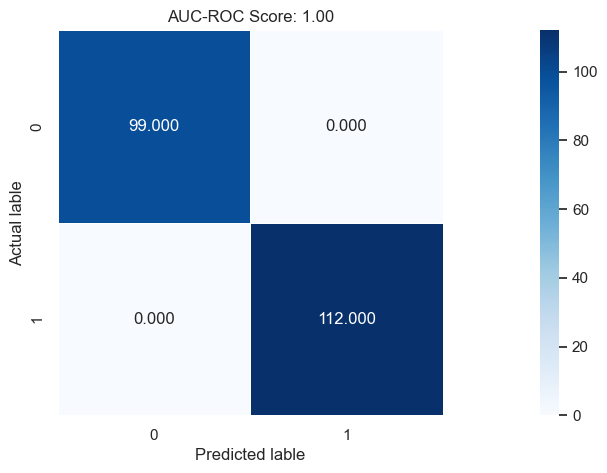

*******************************************************
Validation Set Performance : 
*******************************************************
Accuracy of Decision Tree : 0.80
ROC AUC Score of Decision Tree : 0.79
Confusion Matrix of Decision Tree : [[19  6]
 [ 6 29]]


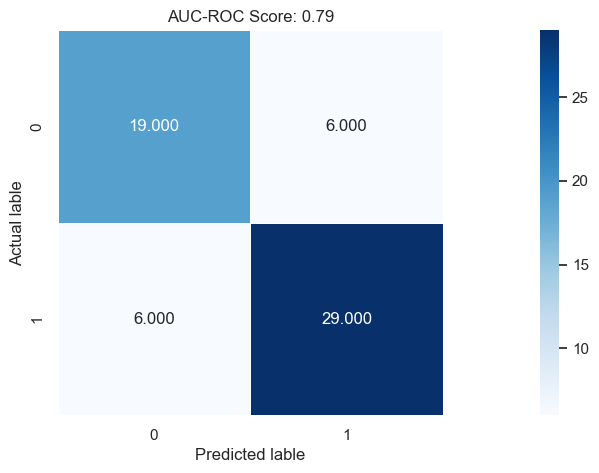

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DTC = DecisionTreeClassifier(criterion='entropy', random_state=42) # Baseline model without any form of Pruning
ml_model(DTC, "Decision Tree", x_train = x_train, y_train = y_train, x_valid = x_valid, y_valid = y_valid, x_test=None)

In [29]:
# Visualize the Decision Trees
plt.figure(figsize=(25,15), dpi =500)
plot_tree(DTC, filled = True)
plt.show()

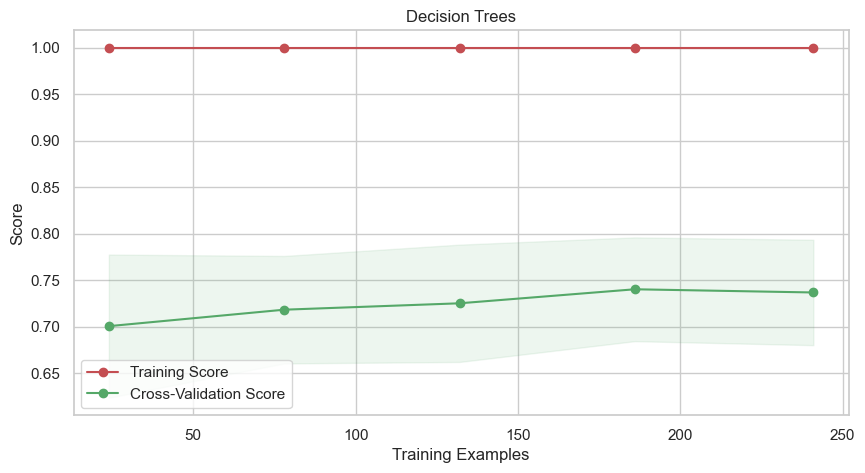

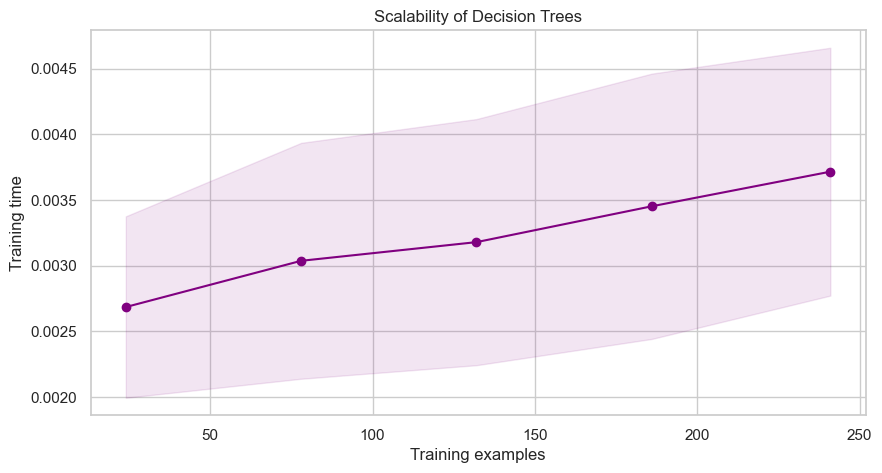

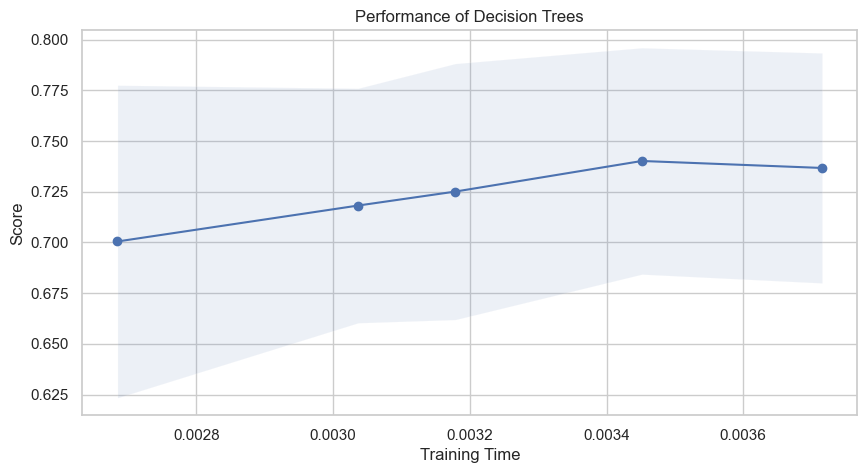

In [30]:
# Generation of Model Curves on training and Cross Validation EData
generate_learning_curves(
    model = DTC, 
    model_name = "Decision Trees", 
    X = input_data,
    y = targets,
    ylim=(0.7, 1.01),
    epochs=5,
    figsize=(10,5))

#### Hyper-parameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

# We will apply Grid Search to find the best possible set of Hyper Parameters
def DTGridSearch(X,y,param_lim):
    '''
    Decision Tree Grid Search to find the initial best guess of hyper-paramters
    '''
    param_grid = {
        'min_samples_leaf': np.linspace(param_lim[0], param_lim[1],20).astype('int'),
        'max_depth':np.arange(1,param_lim[2]),
        'criterion' : ['entropy', 'gini']
    }
    
    best_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=3), param_grid=param_grid, cv=10,  n_jobs=-1)
    best_DT.fit(X, y)
    
    best_params = best_DT.best_params_
    
    print('Best Decision Tree Hyper-Parameters are:')
    print(best_params)
    
    
    return best_params['min_samples_leaf'], best_params['max_depth'], best_params['criterion']


In [32]:
min_samples_leaf_lim = int(0.005*len(x_train)) # 0.5 % of length of training Size
max_samples_leaf_lim = int(0.1 * len(x_train)) # 10 % of length of training size
max_depth  = 10

best_min_sample_leaf, best_max_depth, best_criterion = DTGridSearch( x_train,
                                                                     y_train,
                                                                     (min_samples_leaf_lim, max_samples_leaf_lim, max_depth)
                                                                   )

Best Decision Tree Hyper-Parameters are:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 14}


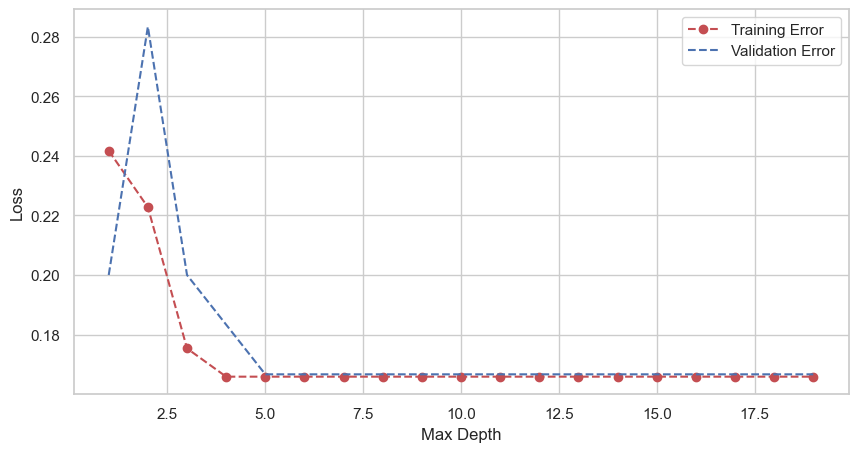

In [33]:
train = []
valid = []
for i in range(1,20):
    dec = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=i, random_state=23)
    dec.fit(x_train, y_train)
    train.append(1- accuracy_score(dec.predict(x_train), y_train))
    valid.append(1-accuracy_score(dec.predict(x_valid), y_valid))
    
plt.figure(figsize=(10,5))
depth = [i for i in range(1,20)]
plt.plot(depth, train,"o--", color='r', label= "Training Error")
plt.plot(depth, valid,"--", color='b' , label= "Validation Error")
plt.xlabel("Max Depth")
plt.ylabel("Loss")
plt.legend()

*******************************************************
Training Set Performance : 
*******************************************************
Accuracy of Decision Tree : 0.83
ROC AUC Score of Decision Tree : 0.83
Confusion Matrix of Decision Tree : [[79 20]
 [15 97]]


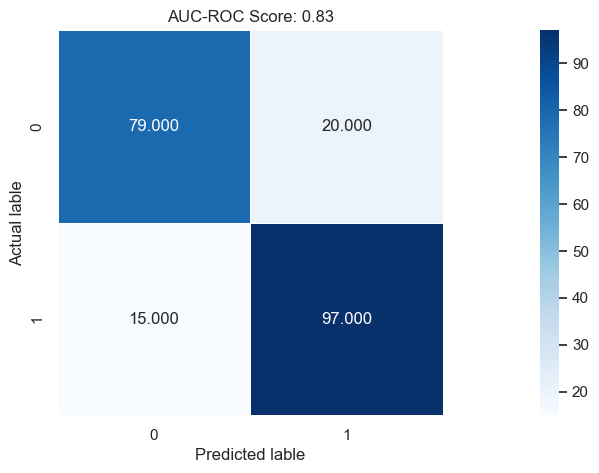

*******************************************************
Validation Set Performance : 
*******************************************************
Accuracy of Decision Tree : 0.82
ROC AUC Score of Decision Tree : 0.80
Confusion Matrix of Decision Tree : [[18  7]
 [ 4 31]]


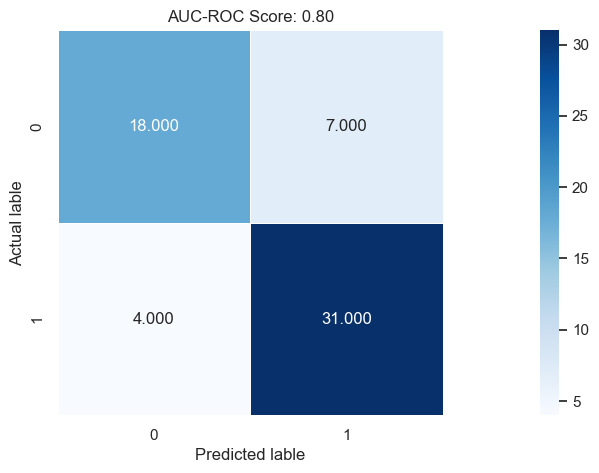

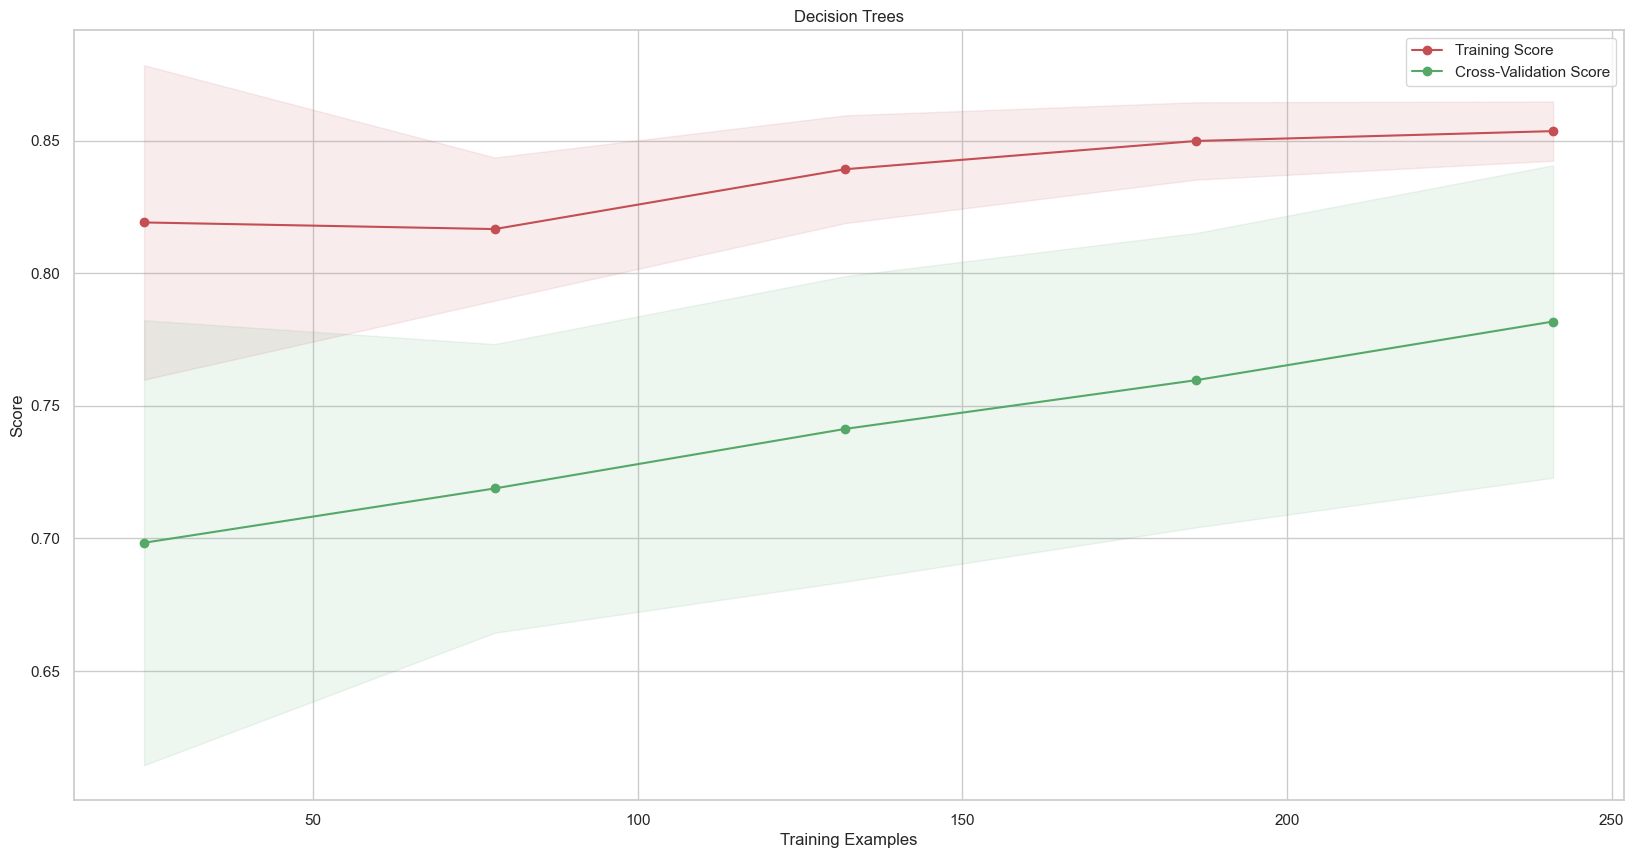

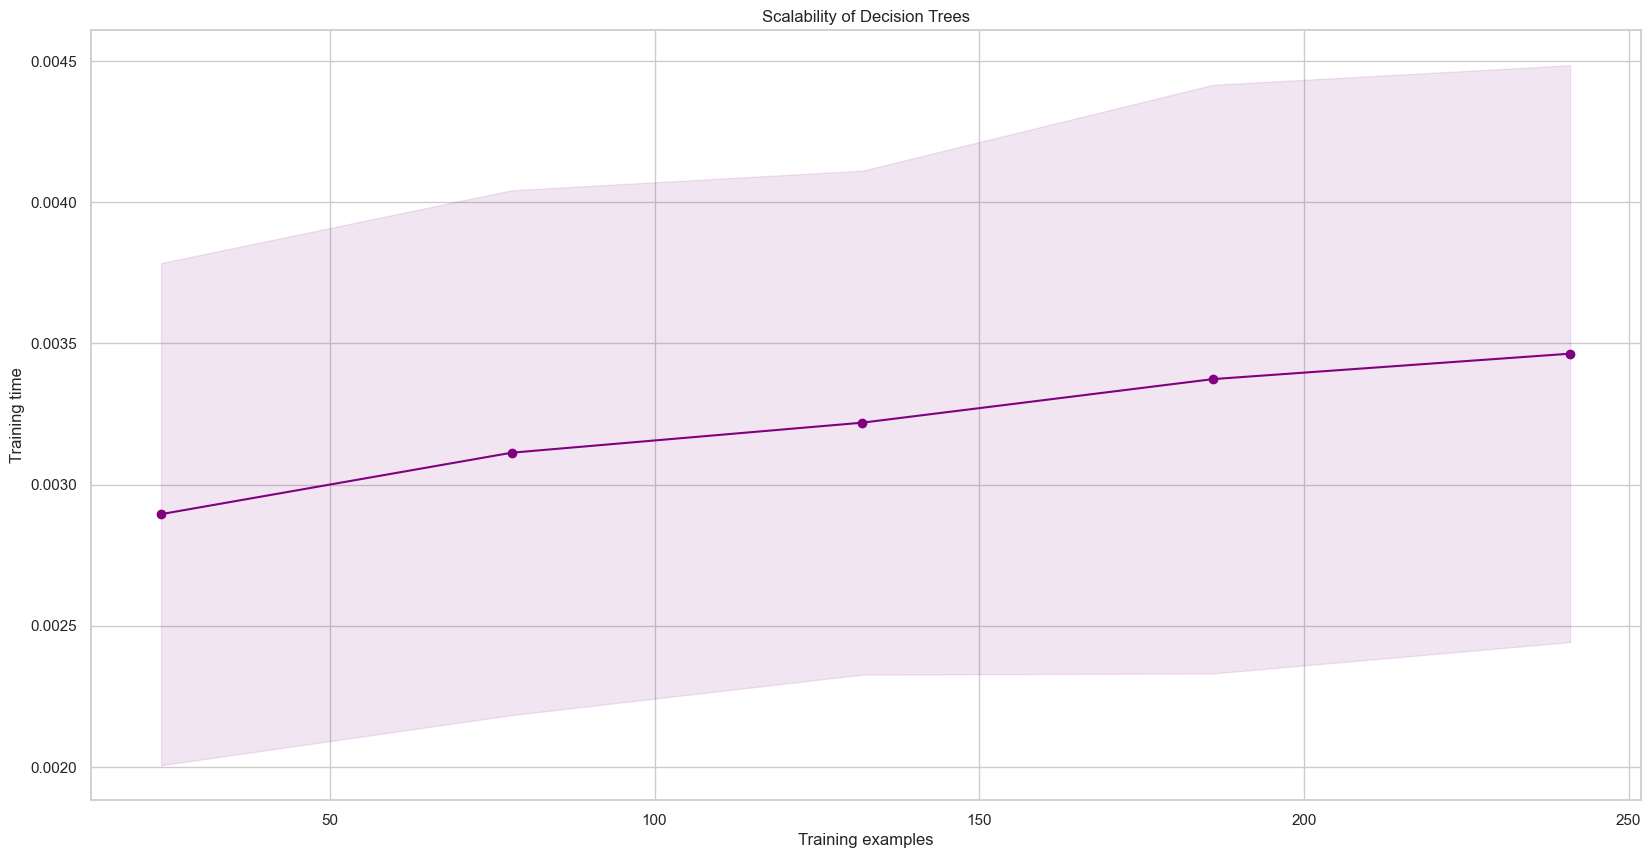

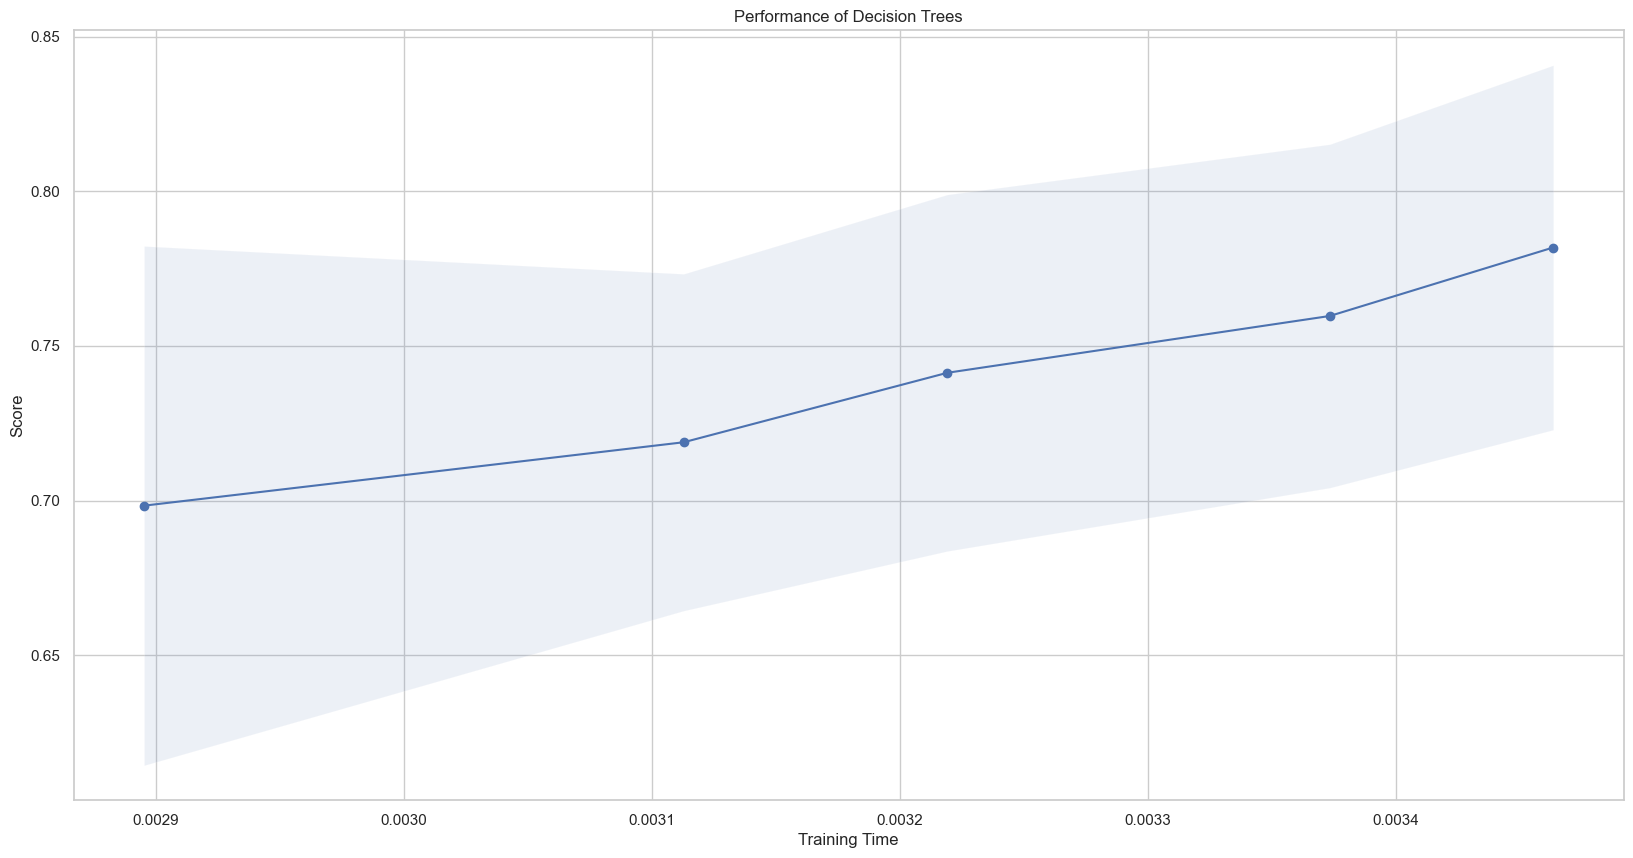

In [34]:
# Considering the max_depth as 5 and min_sample as 10 -
tuned_DTC = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=3)
ml_model(tuned_DTC, 'Decision Tree', x_train = x_train, y_train = y_train, x_valid = x_valid, y_valid = y_valid, x_test = None)

generate_learning_curves(
    model = tuned_DTC, 
    model_name = "Decision Trees", 
    X = input_data,
    y = targets,
    ylim=(0.7, 1.01),
    epochs=5)


#### Baseline ADABoost

*******************************************************
Training Set Performance : 
*******************************************************
Accuracy of ADABoost : 0.97
ROC AUC Score of ADABoost : 0.97
Confusion Matrix of ADABoost : [[ 95   4]
 [  3 109]]


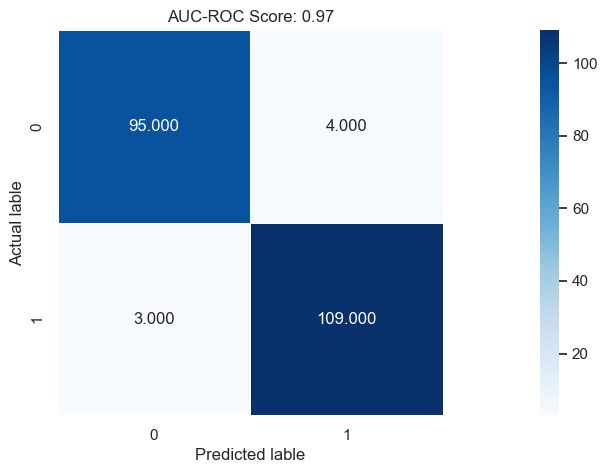

*******************************************************
Validation Set Performance : 
*******************************************************
Accuracy of ADABoost : 0.75
ROC AUC Score of ADABoost : 0.75
Confusion Matrix of ADABoost : [[18  7]
 [ 8 27]]


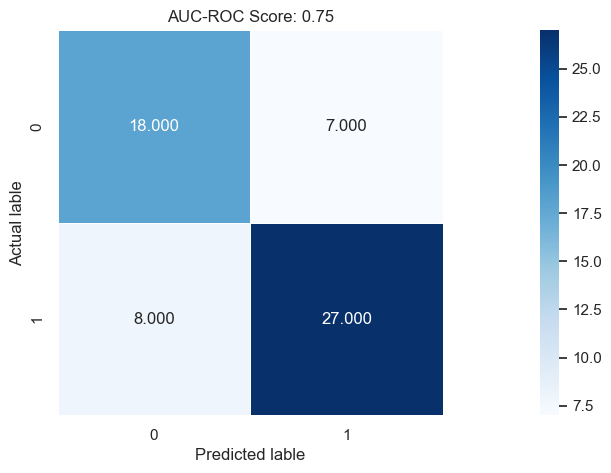

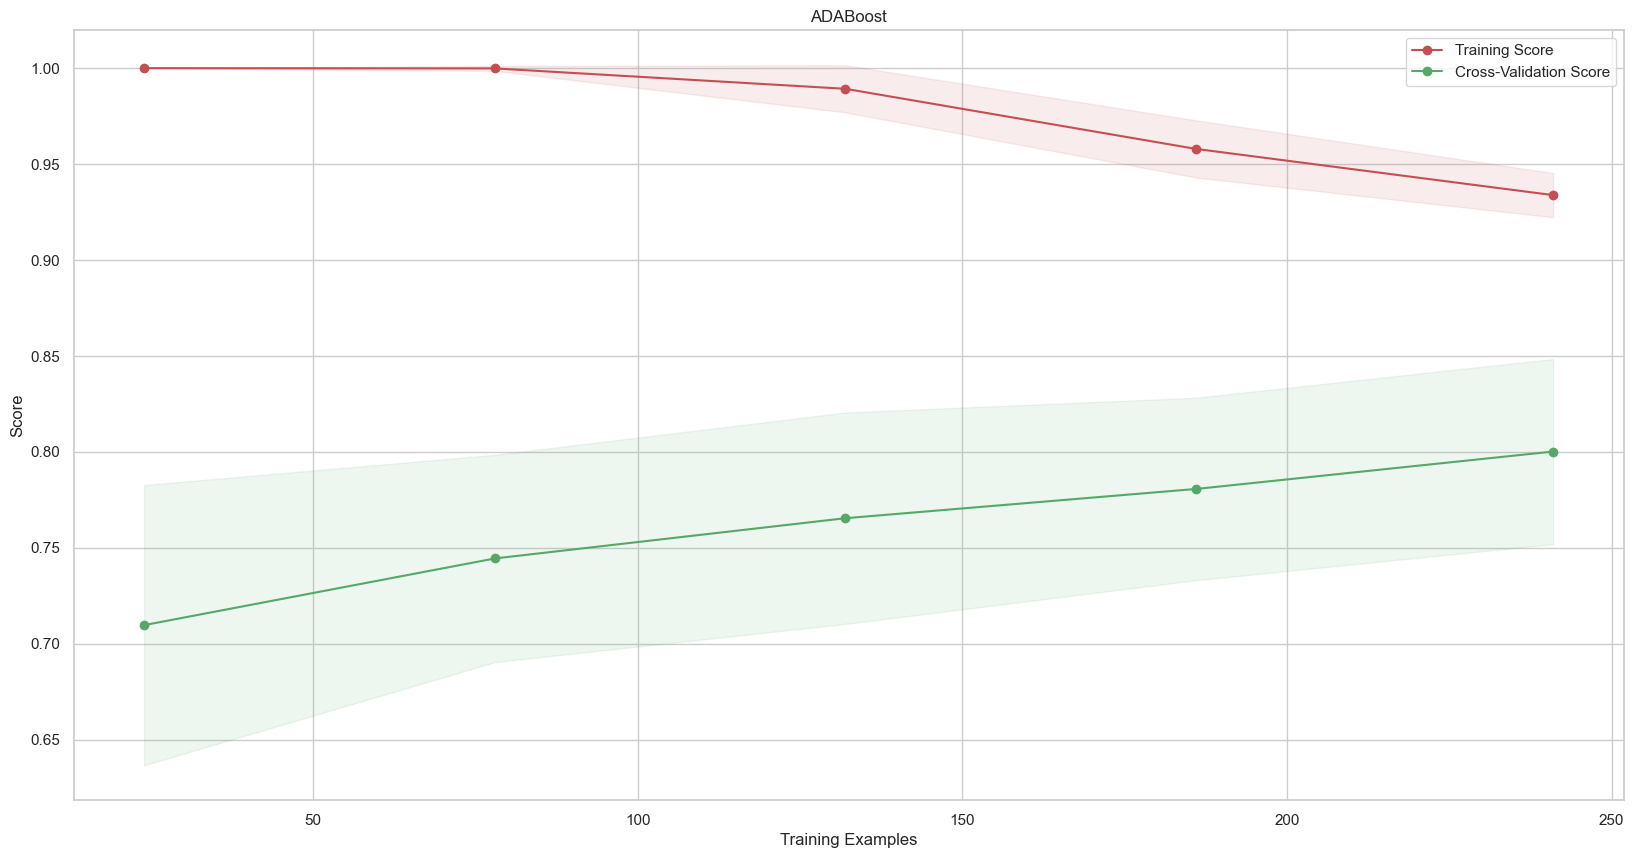

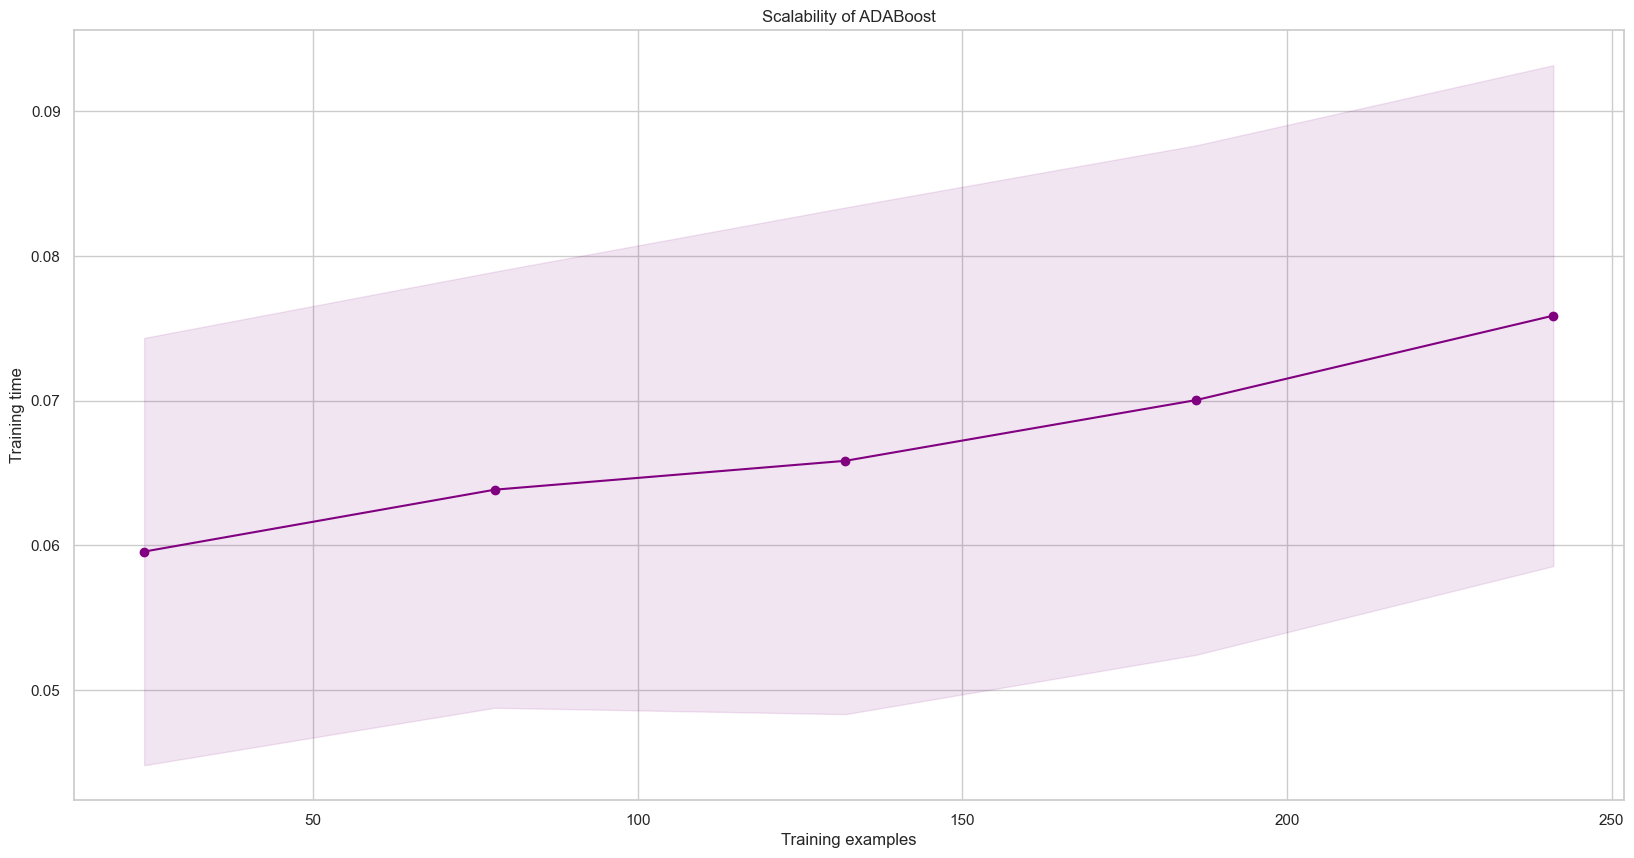

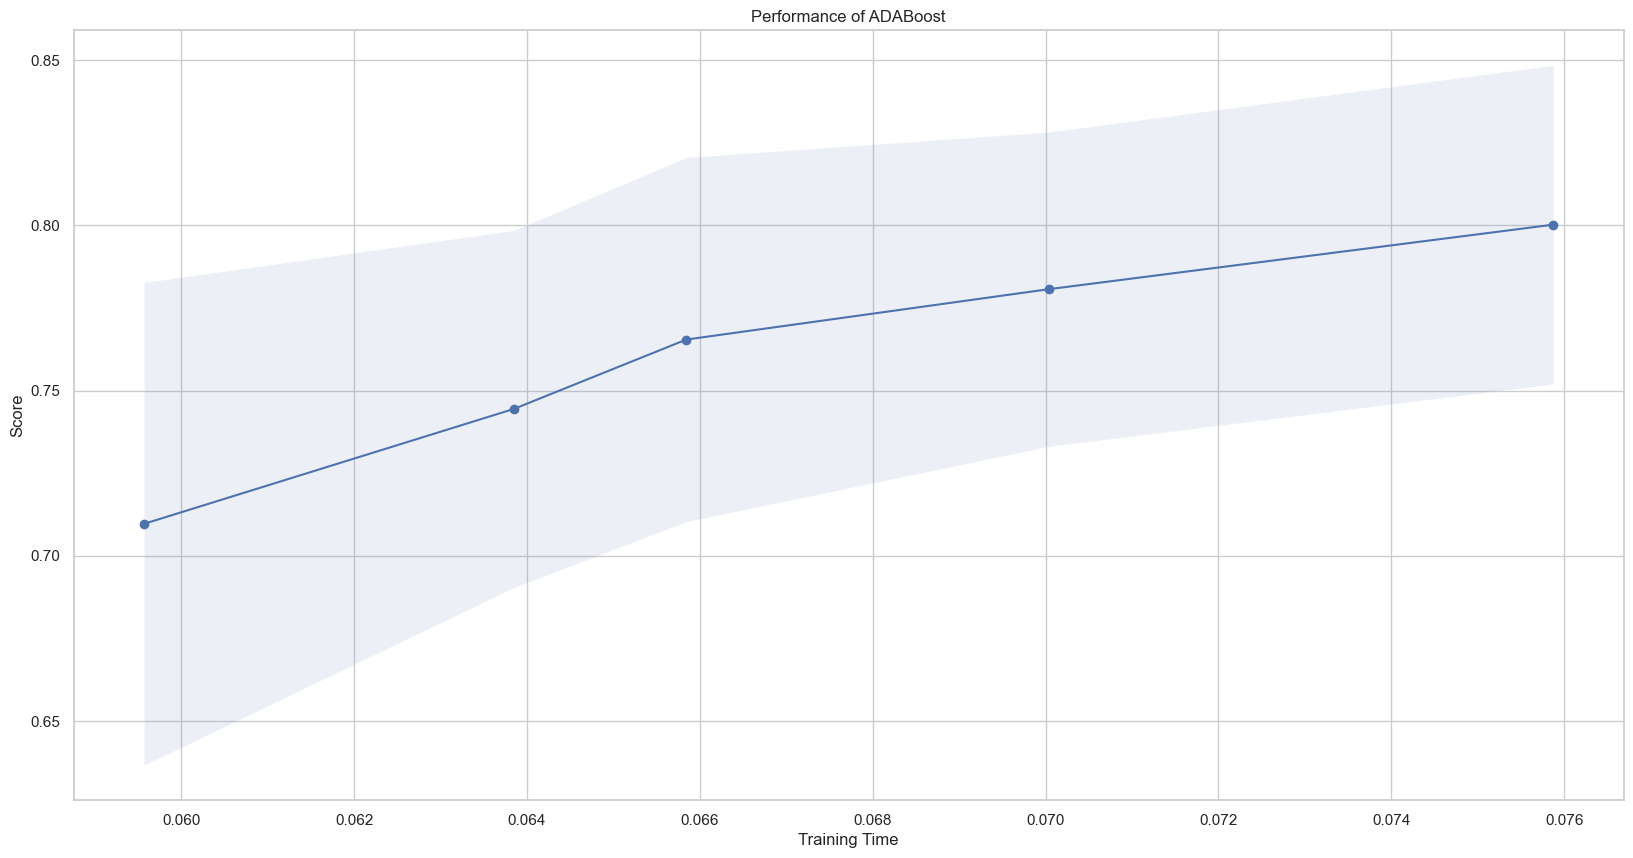

In [35]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(random_state=45)

ml_model(adaBoost, 'ADABoost', x_train = x_train, x_valid = x_valid, y_train =  y_train.values.ravel(), y_valid = y_valid.values.ravel(), x_test = None)

generate_learning_curves(
    model = adaBoost, 
    model_name = "ADABoost", 
    X = input_data,
    y = targets,
    epochs=4)

#### Hyper-Parameter Tuning

In [36]:
def ABGridSearch(X, y, param_limits):
    '''
    Grid Search for ADABoost
    '''
    param_grid = {
        'n_estimators': param_limits[0],
        'learning_rate' : param_limits[1],
        'algorithm' : param_limits[2]
    }
    
    best_adb = GridSearchCV(
                            estimator= AdaBoostClassifier(random_state=20),
                            param_grid=param_grid,
                            cv=10
                            )
    
    best_adb.fit(X,y)
    
    print("Best Decision Tree Hyper-Parameters are:")
    print(best_adb.best_params_)
    
    return best_adb.best_params_['n_estimators'], best_adb.best_params_['learning_rate'], best_adb.best_params_['algorithm']

In [37]:
n_estimators = list(range(10,100,10))
learning_rate = [0.05, 0.1, 0.5, 1.0]
algorithm = ['SAMME', 'SAMME.R']
best_n_estimators, best_lr, best_algo = ABGridSearch(x_train,  y_train.values.ravel(), (n_estimators, learning_rate, algorithm))

Best Decision Tree Hyper-Parameters are:
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 80}


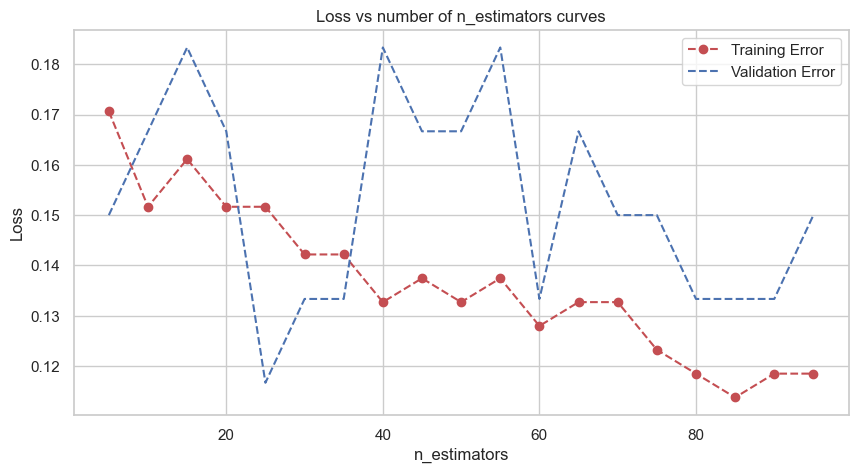

In [38]:
train = []
valid = []
for i in range(5,100,5):
    adaBoost = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = best_lr, n_estimators=i, random_state=20)
    adaBoost.fit(x_train, y_train.values.ravel())
    train.append(1- accuracy_score(adaBoost.predict(x_train), y_train.values.ravel()))
    valid.append(1-accuracy_score(adaBoost.predict(x_valid), y_valid.values.ravel()))
    
plt.figure(figsize=(10,5))
num_estimators = [i for i in range(5,100,5)]
plt.plot(num_estimators, train,"o--", color='r', label= "Training Error")
plt.plot(num_estimators, valid,"--", color='b' , label= "Validation Error")
plt.xlabel('n_estimators')
plt.ylabel("Loss")
plt.title('Loss vs number of n_estimators curves')
plt.legend()
plt.show()

*******************************************************
Training Set Performance : 
*******************************************************
Accuracy of ADABoost : 0.87
ROC AUC Score of ADABoost : 0.86
Confusion Matrix of ADABoost : [[ 81  18]
 [ 10 102]]


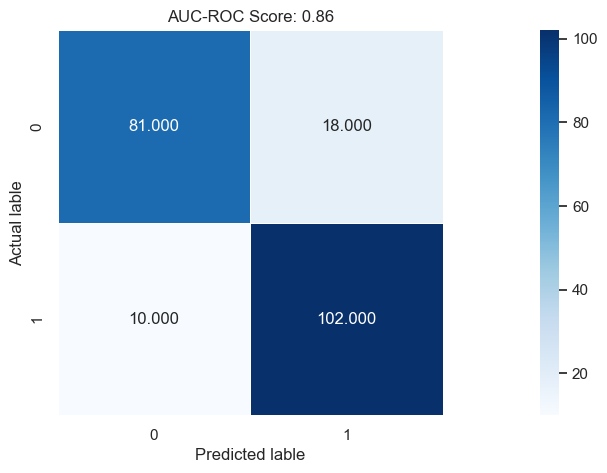

*******************************************************
Validation Set Performance : 
*******************************************************
Accuracy of ADABoost : 0.82
ROC AUC Score of ADABoost : 0.80
Confusion Matrix of ADABoost : [[18  7]
 [ 4 31]]


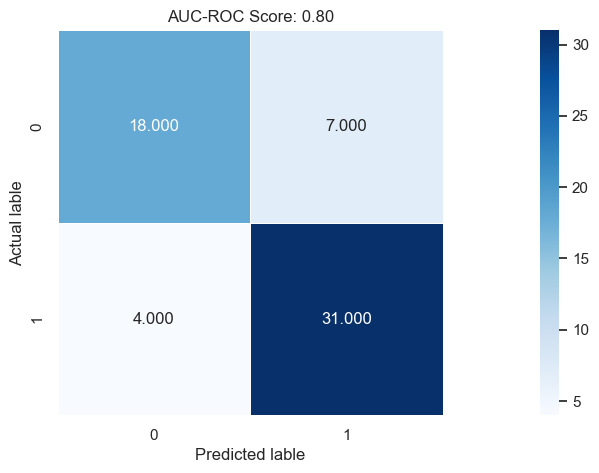

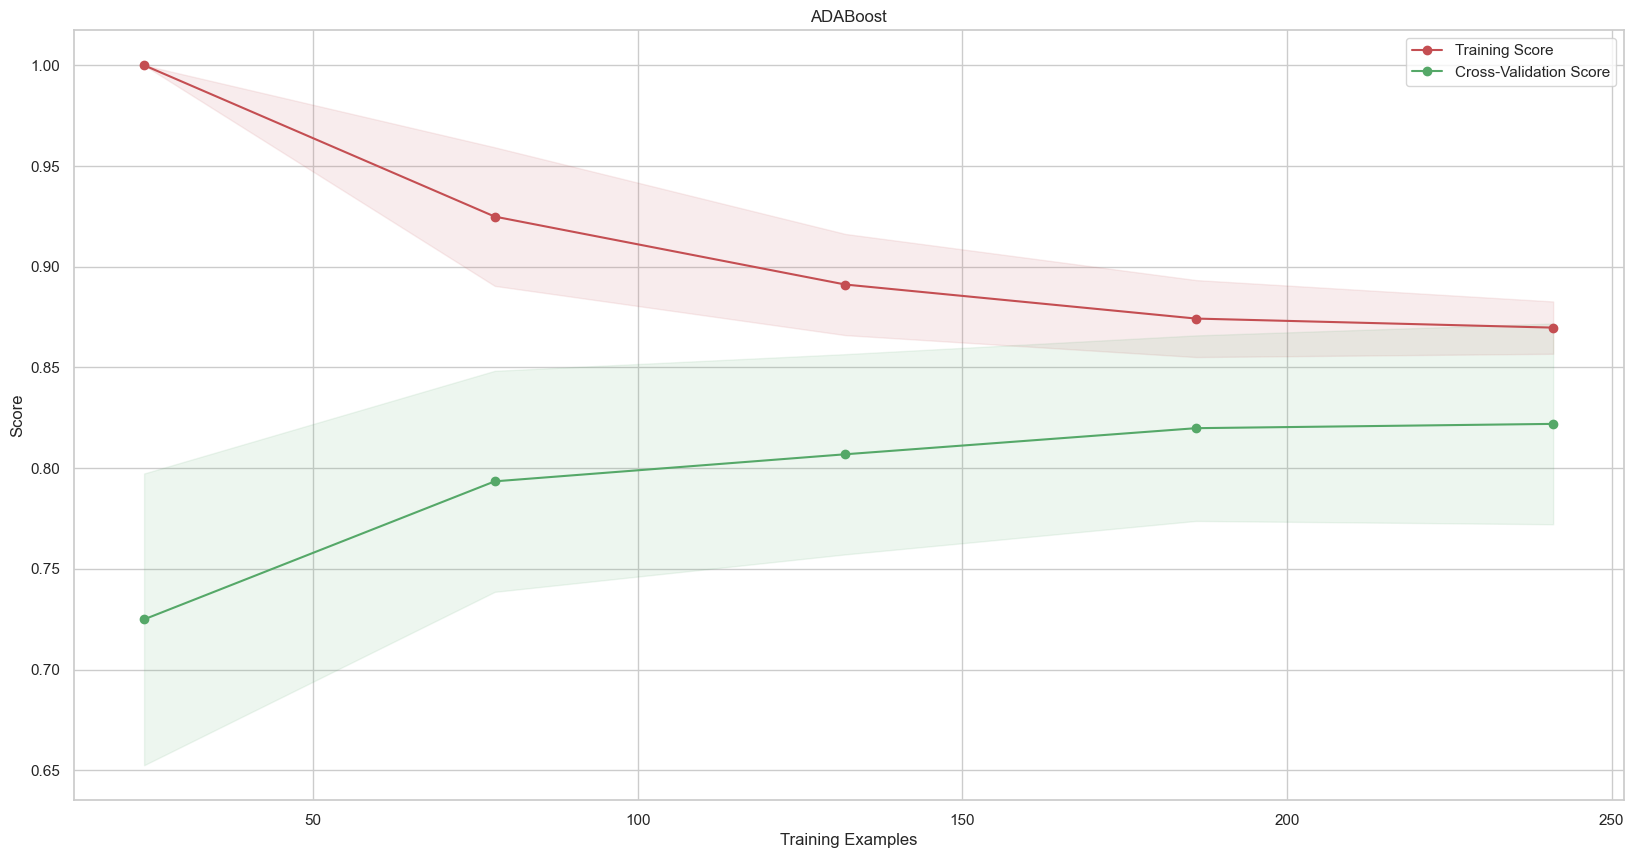

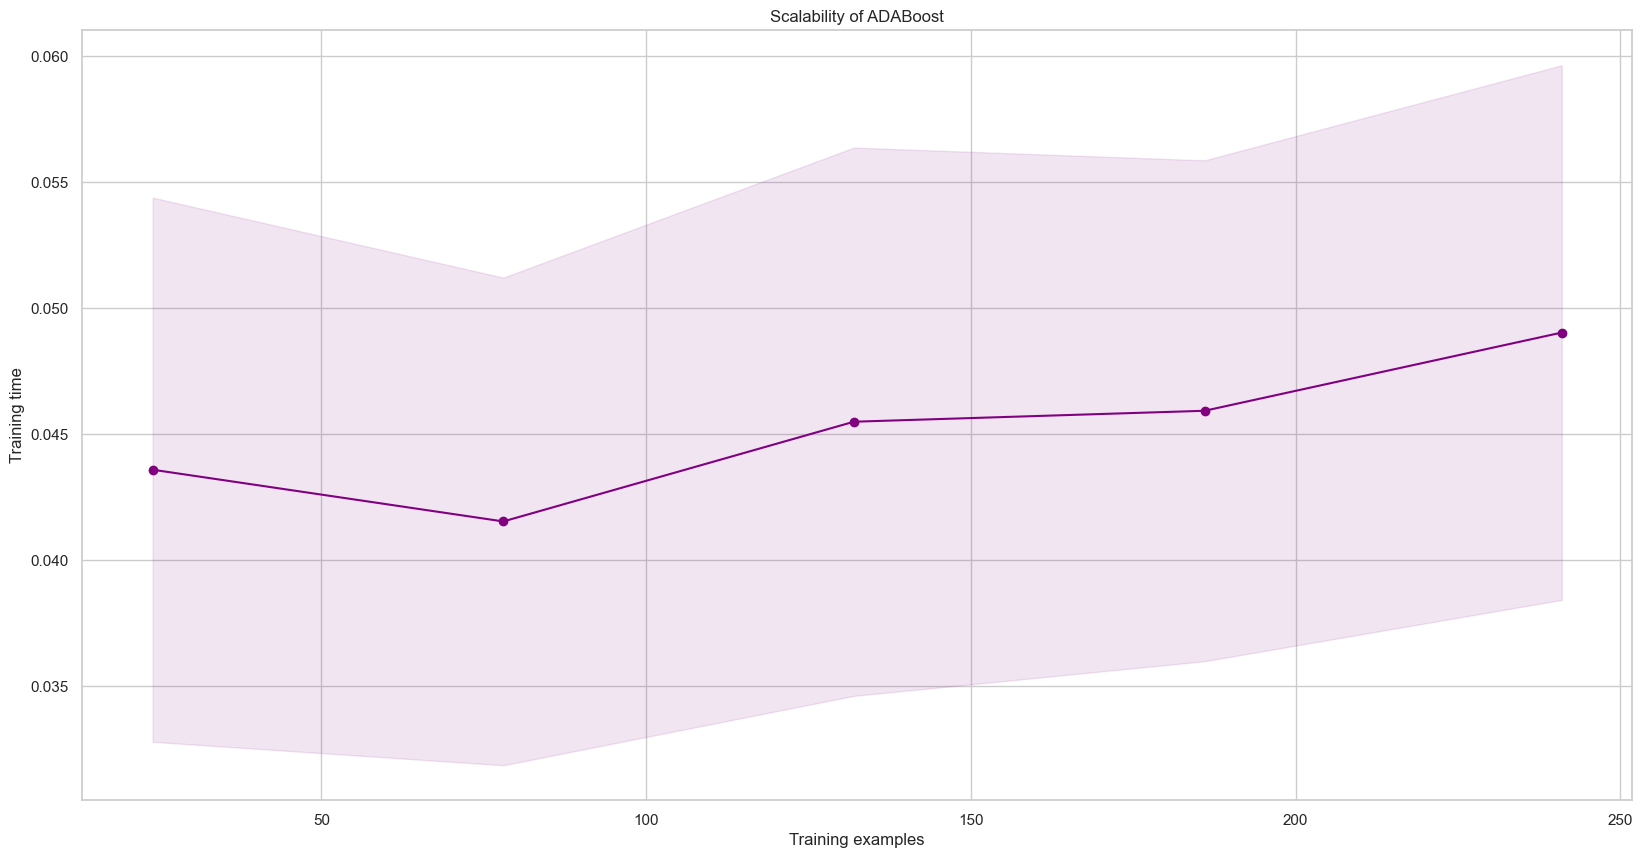

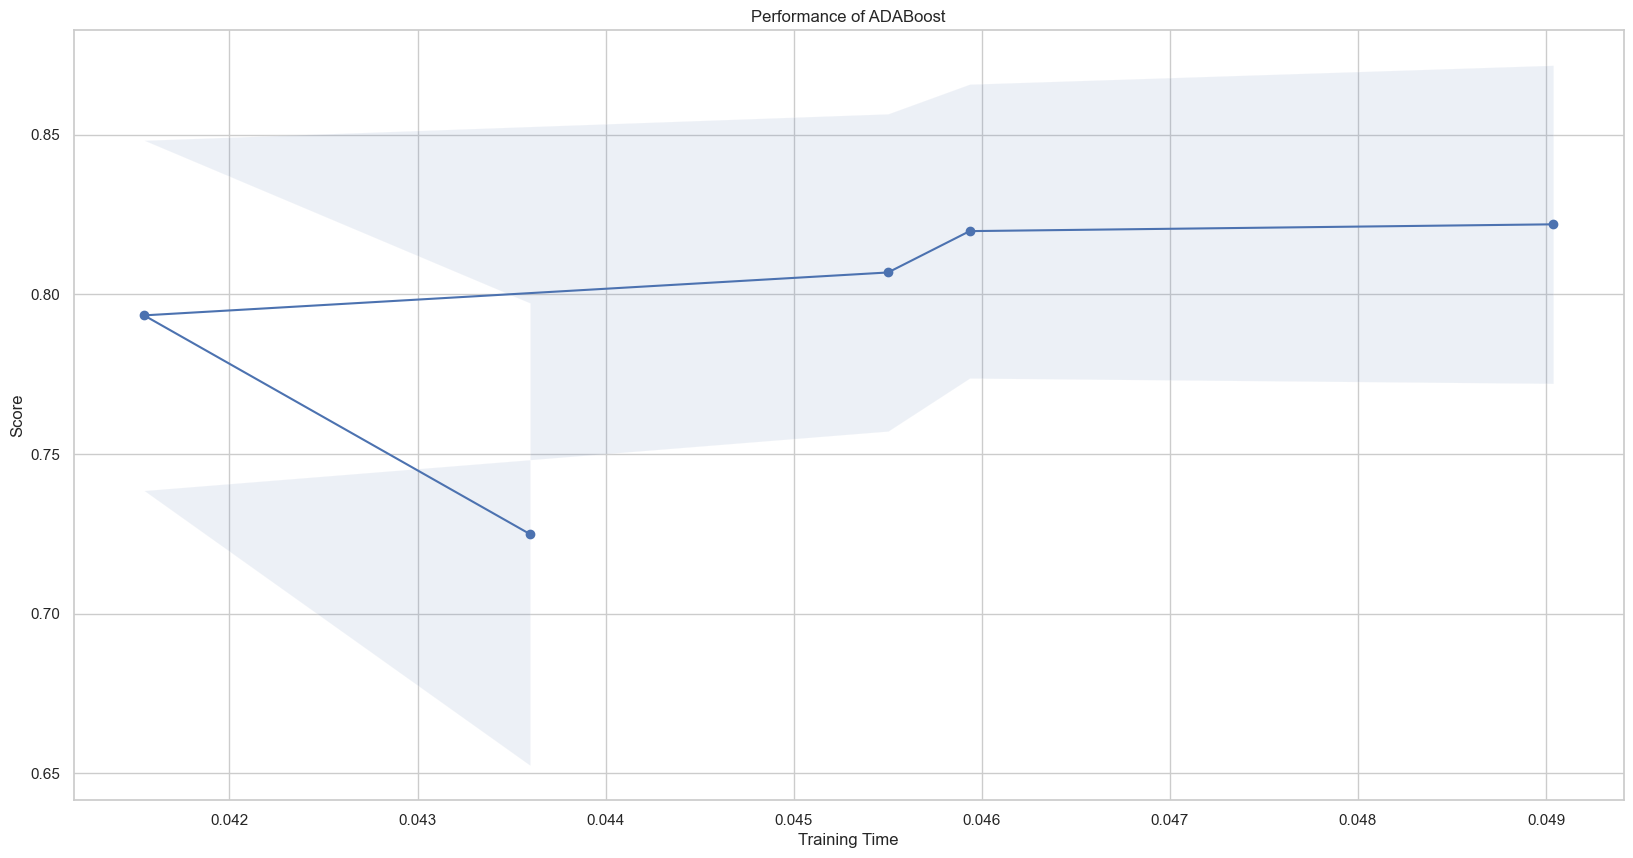

In [39]:
tuned_adaBoost = AdaBoostClassifier(n_estimators=40, algorithm = 'SAMME', learning_rate = 0.5, random_state=7)

ml_model(tuned_adaBoost, 'ADABoost', x_train = x_train, x_valid = x_valid, y_train =  y_train.values.ravel(), y_valid = y_valid.values.ravel(), x_test = None)

generate_learning_curves(
    model = tuned_adaBoost, 
    model_name = "ADABoost", 
    X = input_data,
    y = targets,
    epochs=4)

## Section 5 : Model Performance on Test Data

For the tuned ADA Boost Model :

*****************************************************
Test Set Performance:
*****************************************************
Model Time Complexity on Test Data: 3.962 milli second
Accuracy of tuned ADA Boost : 0.81
ROC AUC Score of tuned ADA Boost : 0.81
Confusion Matrix of tuned ADA Boost : [[12  2]
 [ 4 13]]


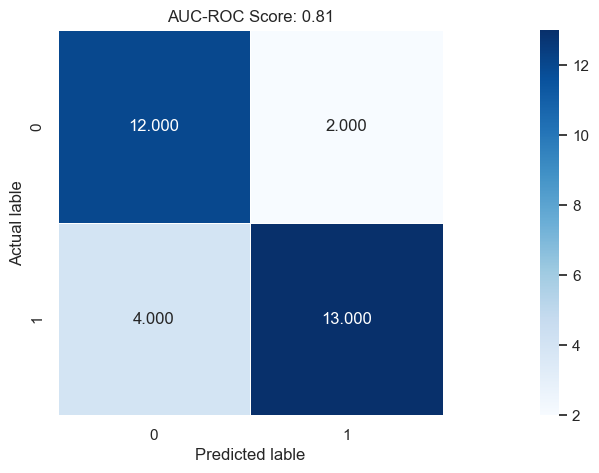

['models\\Niranjan_Model_01_adaboost.joblib']

In [40]:
from joblib import dump

print('For the tuned ADA Boost Model :\n')
ml_model(tuned_adaBoost, 'tuned ADA Boost', x_train= None, x_valid=None, x_test=x_test, y_test=y_test.values.ravel())
dump(tuned_adaBoost, r"models\Niranjan_Model_01_adaboost.joblib")